In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
pd.set_option('display.max_columns', None)

In [106]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [107]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global the millennia,sector 37d,0.60,9231.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,1,35,325.000000
1,flat,shree vardhman victoria,sector 70,1.80,9231.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3,5,3,0.0,NaN,New Property,NaN,NaN,1950.00,0,0,0,0,0,1,72,650.000000
2,flat,signature global park,sohna road,0.87,7190.0,1210.0,Built Up area: 1210 (112.41 sq.m.)Carpet area:...,3,2,3,4.0,NaN,Undefined,NaN,1210.0,870.00,0,0,0,0,0,1,58,403.333333
3,flat,conscient heritage max,sector 102,2.00,9307.0,2149.0,Super Built up area 2149(199.65 sq.m.)Built Up...,3,4,3+,13.0,North-East,Relatively New,2149.0,1900.0,1650.00,1,1,0,0,0,2,174,716.333333
4,flat,emaar mgf emerald floors premier,sector 65,2.35,16207.0,1450.0,Super Built up area 1650(153.29 sq.m.)Built Up...,3,3,3,2.0,South-East,Relatively New,1650.0,1500.0,1450.00,1,1,0,0,0,2,64,483.333333


In [108]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

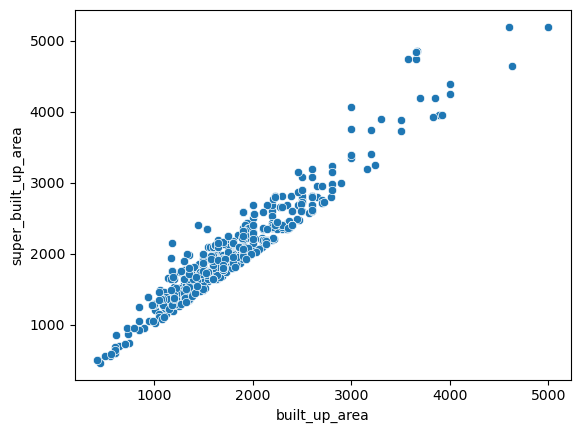

In [109]:
sns.scatterplot(x = df['built_up_area'],y=df['super_built_up_area'])

In [110]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [111]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [112]:
all_present_df.shape

(531, 24)

In [113]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [114]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [115]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [116]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [117]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global the millennia,sector 37d,0.60,9231.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,1,35,325.000000
14,flat,umang winter hills,sector 77,0.92,5049.0,1822.0,Super Built up area 1822(169.27 sq.m.)Carpet a...,3,3,3,17.0,North-East,Relatively New,1822.0,NaN,1400.00,0,0,0,0,1,2,49,607.333333
26,flat,godrej nature plus,sector 33,1.40,9333.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,2,2,3,14.0,NaN,Under Construction,1500.0,NaN,1385.00,0,0,0,0,0,1,67,750.000000
29,flat,ambience creacions,sector 22,2.79,15000.0,1860.0,Super Built up area 1860(172.8 sq.m.)Carpet ar...,3,3,3,13.0,East,New Property,1860.0,NaN,1300.00,0,0,0,0,0,0,158,620.000000
34,flat,bestech park view ananda,sector 81,0.88,8044.0,1094.0,Super Built up area 1360(126.35 sq.m.)Carpet a...,2,2,3,8.0,West,Relatively New,1360.0,NaN,1094.00,1,0,0,0,0,2,95,547.000000


In [118]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\karal\AppData\Local\Temp\ipykernel_18204\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\karal\AppData\Local\Temp\ipykernel_18204\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [119]:
df.update(sbc_df)

In [120]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [121]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [122]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,shree vardhman flora,sector 90,1.00,5128.0,1950.0,Super Built up area 1950(181.16 sq.m.),3,4,3,8.0,North-East,New Property,1950.0,NaN,NaN,0,1,0,0,0,1,95,650.000000
9,flat,bptp terra,sector 37d,1.79,8981.0,1993.0,Super Built up area 1998(185.62 sq.m.),4,3,3,15.0,South-West,Relatively New,1998.0,NaN,NaN,0,0,0,0,1,2,37,498.250000
15,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,7.0,South-East,Moderately Old,2905.0,NaN,NaN,0,1,0,0,0,1,38,726.250000
18,flat,ats triumph,sector 104,2.00,8734.0,2290.0,Super Built up area 2290(212.75 sq.m.),3,4,3+,4.0,NaN,Relatively New,2290.0,NaN,NaN,0,1,0,0,0,1,60,763.333333
27,flat,godrej oasis,sector 88a,1.50,8108.0,1850.0,Super Built up area 1850(171.87 sq.m.),3,3,3+,11.0,North-East,New Property,1850.0,NaN,NaN,0,0,0,0,0,1,39,616.666667


In [123]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\karal\AppData\Local\Temp\ipykernel_18204\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\karal\AppData\Local\Temp\ipykernel_18204\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [124]:
df.update(sb_df)

In [125]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [126]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [127]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,shree vardhman victoria,sector 70,1.80,9231.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3,5,3,0.0,NaN,New Property,NaN,NaN,1950.0,0,0,0,0,0,1,72,650.000000
6,flat,woodstock floors,sector 50,1.05,10628.0,988.0,Carpet area: 988 (91.79 sq.m.),2,2,2,2.0,North,Moderately Old,NaN,NaN,988.0,0,0,0,0,0,1,53,494.000000
13,flat,the lions cghs,sector 56,2.05,8542.0,2400.0,Carpet area: 2400 (222.97 sq.m.),4,4,3+,8.0,West,Moderately Old,NaN,NaN,2400.0,0,0,0,0,0,2,49,600.000000
19,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.0,0,0,0,1,0,0,0,360.000000
22,flat,sare homes,sector 92,0.56,4730.0,1184.0,Carpet area: 1184 (110 sq.m.),3,1,3,1.0,East,Moderately Old,NaN,NaN,1184.0,0,0,0,0,0,2,75,394.666667


In [128]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\karal\AppData\Local\Temp\ipykernel_18204\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\karal\AppData\Local\Temp\ipykernel_18204\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [129]:
df.update(c_df)

In [130]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

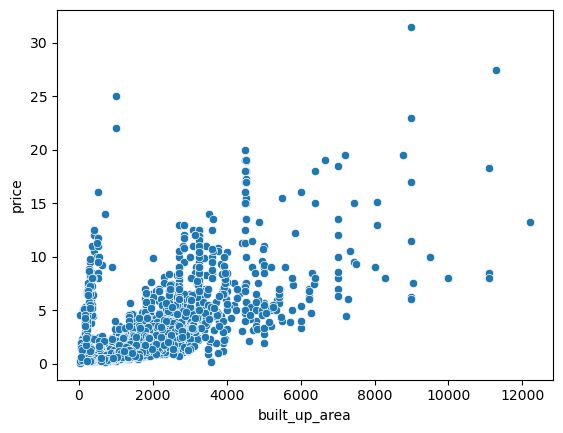

In [131]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [132]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [133]:
anamoly_df.sample(5)

,price,area,built_up_area
2402,8.70,2250.0,267.0
2773,5.50,2700.0,300.0
183,22.00,8250.0,1000.0
1277,3.50,1975.0,1787.0
1382,3.25,8829.0,981.0


In [134]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [135]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

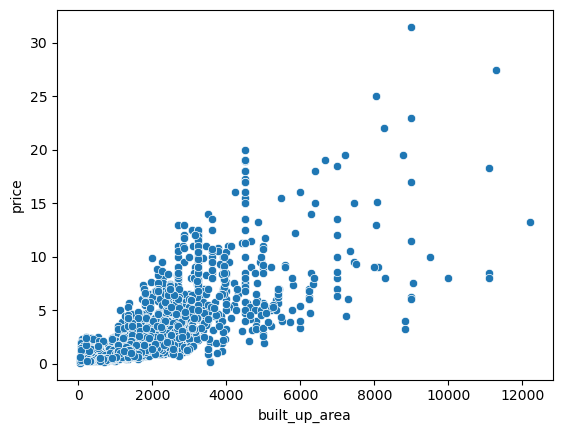

In [136]:
sns.scatterplot(x = df['built_up_area'], y = df['price'])

In [137]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [138]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global the millennia,sector 37d,0.60,9231.0,2,2,3,7.0,NaN,New Property,625.0,0,0,0,0,0,1,35
1,flat,shree vardhman victoria,sector 70,1.80,9231.0,3,5,3,0.0,NaN,New Property,2167.0,0,0,0,0,0,1,72
2,flat,signature global park,sohna road,0.87,7190.0,3,2,3,4.0,NaN,Undefined,1210.0,0,0,0,0,0,1,58
3,flat,conscient heritage max,sector 102,2.00,9307.0,3,4,3+,13.0,North-East,Relatively New,1900.0,1,1,0,0,0,2,174
4,flat,emaar mgf emerald floors premier,sector 65,2.35,16207.0,3,3,3,2.0,South-East,Relatively New,1500.0,1,1,0,0,0,2,64


In [139]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [140]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
57,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
678,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,1,88
1008,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,1,9
1276,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,1,59
1492,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,1,0
1514,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,1,0
2008,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,1,9
2028,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
2053,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,2,114
2057,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,1,0


In [141]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [142]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\karal\AppData\Local\Temp\ipykernel_18204\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [143]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing

<Axes: ylabel='count'>

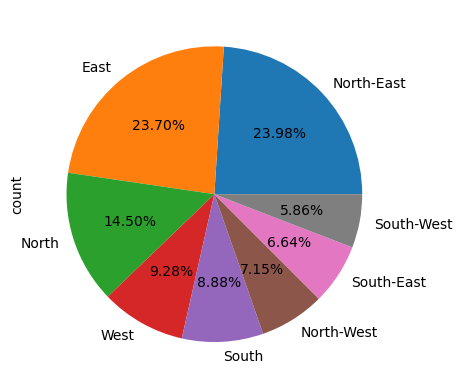

In [144]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [145]:
df.drop(columns=['facing'],inplace=True)

In [146]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2118,flat,indiabulls enigma,sector 110,4.49,11572.0,5,5,3+,4.0,Relatively New,3511.00,0,1,0,0,0,1,165
2509,flat,ireo skyon,sector 60,3.75,13393.0,4,5,3,15.0,Relatively New,2534.00,0,1,0,0,0,1,167
2853,flat,jammu and kashmir bank employees cghs,sector 9a,0.95,6129.0,3,3,2,5.0,Moderately Old,1403.00,0,0,0,0,1,1,30
24,flat,experion the heartsong,sector 108,0.98,13351.0,2,3,3,4.0,Relatively New,978.23,1,0,0,0,0,1,135
407,flat,shree vardhman flora,sector 90,1.25,4854.0,4,5,2,8.0,Relatively New,2330.00,1,1,0,0,0,1,165


In [147]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [148]:
df[df["society"].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3536,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [149]:
df.drop(index=[3536],inplace=True)

In [150]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [151]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [152]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,signature global park,sohna road,0.87,7190.0,3,2,3,4.0,Undefined,1210.0,0,0,0,0,0,1,58
33,flat,m3m heights,sector 65,2.78,15200.0,3,3,3,44.0,Undefined,1829.0,0,0,0,0,0,1,56
48,flat,shree vardhman flora,sector 90,0.80,5926.0,2,3,2,0.0,Undefined,1350.0,0,0,0,0,0,1,60
70,flat,krisumi waterfall residences,sector 36a,2.30,15551.0,2,2,2,23.0,Undefined,1479.0,0,0,0,0,0,1,58
71,flat,shapoorji pallonji joyville,sector 102,1.10,12022.0,2,2,1,7.0,Undefined,915.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,flat,supertech hilltown,sector 2,0.80,5556.0,3,2,3,8.0,Undefined,1440.0,0,0,0,0,0,1,0
3515,house,independent,sector 7,1.20,11194.0,2,4,2,3.0,Undefined,1072.0,0,0,0,0,0,1,0
3540,flat,signature global park,sohna road,0.55,6691.0,2,2,3,3.0,Undefined,913.0,0,0,0,0,0,1,58
3544,flat,tulip orange,sector 70,1.10,8148.0,3,2,2,5.0,Undefined,1350.0,0,0,0,0,0,1,0


In [153]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [154]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [155]:
df['agePossession'].value_counts()

agePossession
Relatively New        1718
New Property           597
Moderately Old         583
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [157]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [158]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [159]:
df['agePossession'].value_counts()

agePossession
Relatively New        1727
New Property           598
Moderately Old         590
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [160]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [161]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [162]:
df['agePossession'].value_counts()

agePossession
Relatively New        1729
Moderately Old         621
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [163]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [164]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [165]:
df.shape

(3554, 18)